<a href="https://colab.research.google.com/github/Sarah-0405/Bachelorarbeit_/blob/main/%C3%9Cbersichtskarten_OSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install osmnx geopandas matplotlib contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 27.5 MB/s eta 0:00:00


In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

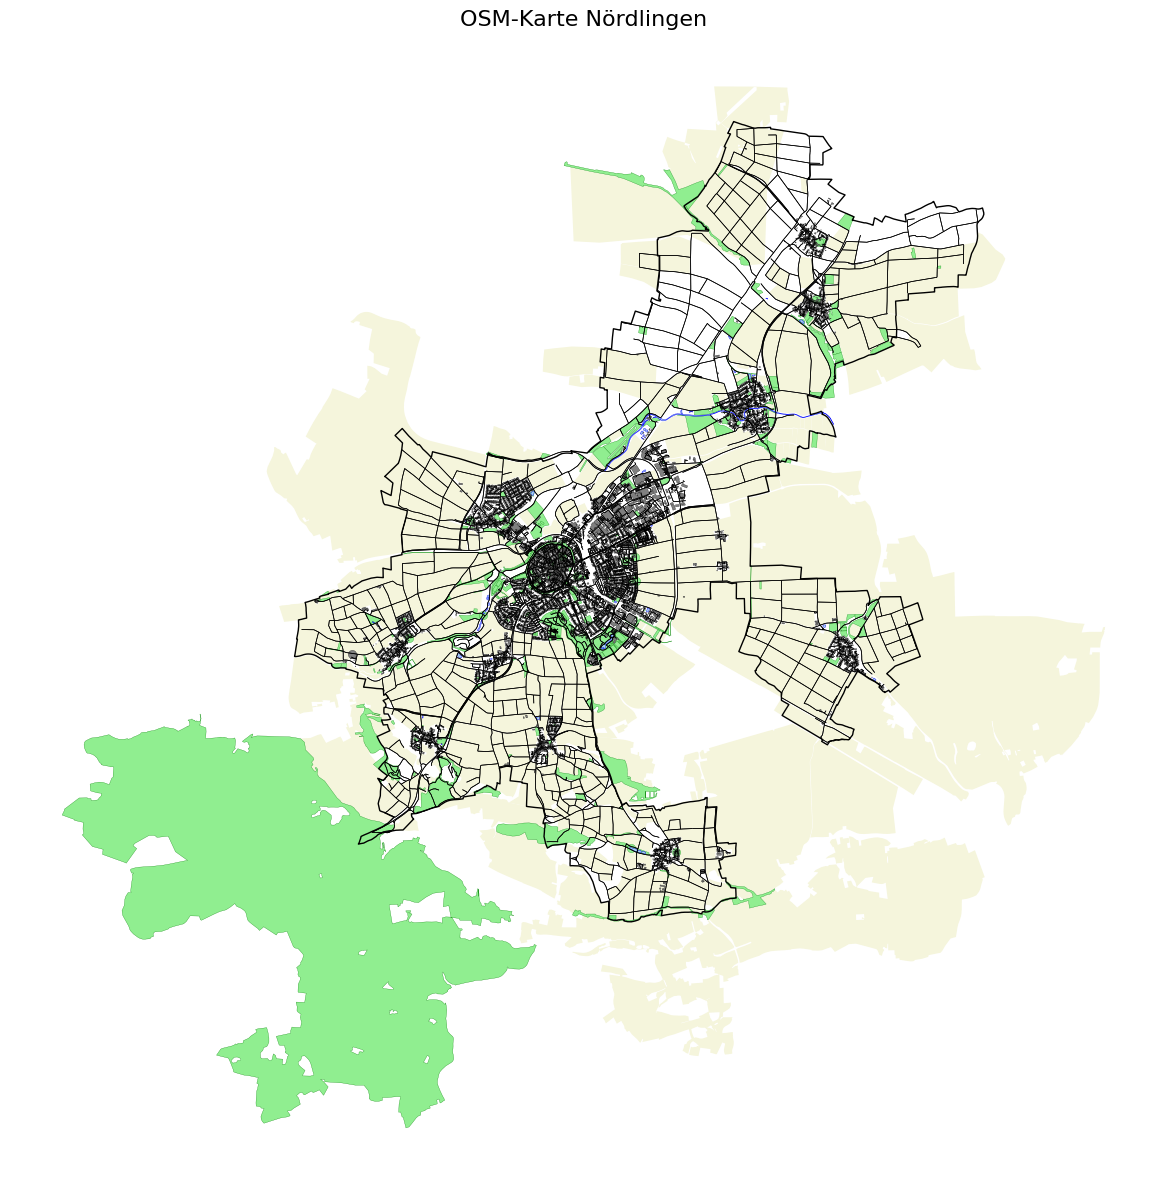

In [ ]:
# Stadtname
stadt = "Nördlingen, Bayern, Deutschland"

# Stadtgrenze als Polygon laden
stadt_gdf = ox.geocode_to_gdf(stadt)
stadt_polygon = stadt_gdf.geometry.iloc[0]

# Gebäude, Gewässer, Grünflächen laden
gebäude = ox.features_from_polygon(stadt_polygon, tags={"building": True})

gewässer = ox.features_from_polygon(stadt_polygon, tags={
    "natural": "water"
})

grünflächen = ox.features_from_polygon(stadt_polygon, tags={
    "leisure": True,
    "landuse": ["grass", "meadow", "forest", "recreation_ground", "park", "village_green"]
})

# Landwirtschaftlich genutzte Flächen
landwirtschaft = ox.features_from_polygon(stadt_polygon, tags={
    "landuse": "farmland"
})

# Straßennetz
G = ox.graph_from_polygon(stadt_polygon, network_type='all')
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# Plotten
fig, ax = plt.subplots(figsize=(12, 12))

# 1. Landwirtschaft (hellbeige)
if not landwirtschaft.empty:
    landwirtschaft.plot(ax=ax, color="#f5f5dc", edgecolor="none")

# 2. Grünflächen
if not grünflächen.empty:
    grünflächen.plot(ax=ax, color="lightgreen", edgecolor="green", linewidth=0.2)

# 3. Gewässer
if not gewässer.empty:
    gewässer.plot(ax=ax, color="lightblue", edgecolor="blue", linewidth=0.3)

# 4. Gebäude
if not gebäude.empty:
    gebäude.plot(ax=ax, color="gray", edgecolor="black", linewidth=0.2)

# 5. Straßen
edges.plot(ax=ax, color="black", linewidth=0.5)

# 6. Stadtgrenze – schwarz und durchgezogen
stadt_gdf.boundary.plot(ax=ax, edgecolor="black", linewidth=1)

# Layout
ax.set_title("OSM-Karte Nördlingen", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()


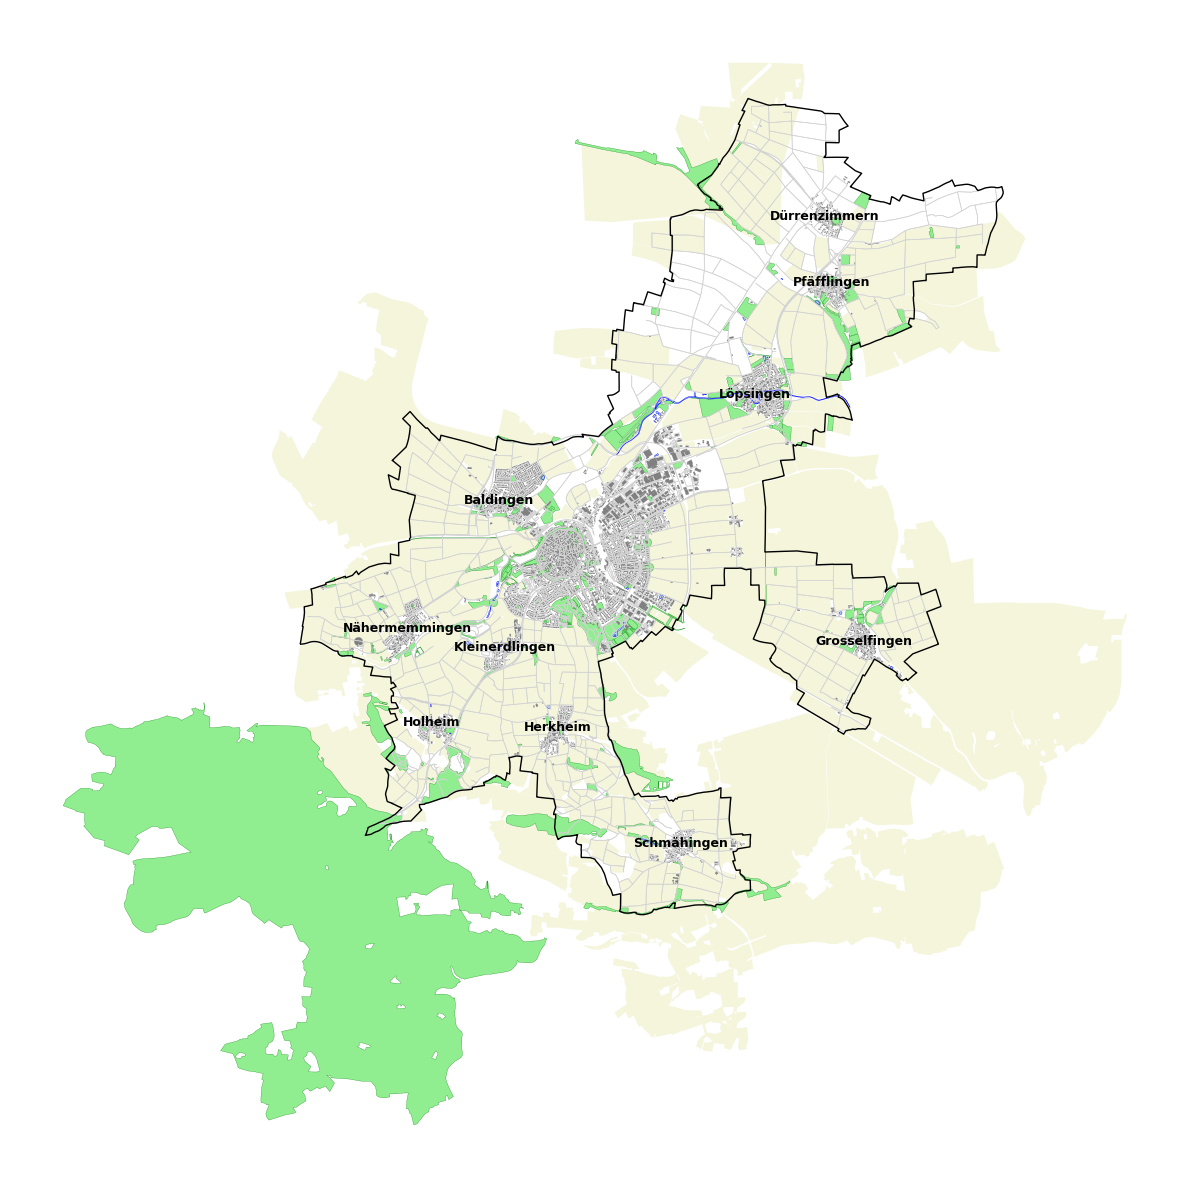

<Figure size 1200x1200 with 0 Axes>

In [ ]:
# Stadtname
stadt = "Nördlingen, Bayern, Deutschland"

# Stadtgrenze laden
stadt_gdf = ox.geocode_to_gdf(stadt)
stadt_polygon = stadt_gdf.geometry.iloc[0]

# OSM-Features laden
gebäude = ox.features_from_polygon(stadt_polygon, tags={"building": True})

gewässer = ox.features_from_polygon(stadt_polygon, tags={
    "natural": "water"
})

grünflächen = ox.features_from_polygon(stadt_polygon, tags={
    "leisure": True,
    "landuse": ["grass", "meadow", "forest", "recreation_ground", "park", "village_green"]
})

landwirtschaft = ox.features_from_polygon(stadt_polygon, tags={
    "landuse": "farmland"
})

# Straßennetz
G = ox.graph_from_polygon(stadt_polygon, network_type='all')
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# Ortschaften (nur innerhalb von Nördlingen)
orte = ox.features_from_polygon(
    stadt_polygon,
    tags={"place": ["suburb", "village"]}
)

# Nur Punkte, die innerhalb der Stadtgrenze liegen
orte_punkte = orte[orte.geometry.type == "Point"]
orte_in_nördlingen = orte_punkte[orte_punkte.geometry.within(stadt_polygon)]

# Plot
fig, ax = plt.subplots(figsize=(12, 12))

# 1. Landwirtschaft (hellbeige)
if not landwirtschaft.empty:
    landwirtschaft.plot(ax=ax, color="#f5f5dc", edgecolor="none")

# 2. Grünflächen
if not grünflächen.empty:
    grünflächen.plot(ax=ax, color="lightgreen", edgecolor="green", linewidth=0.2)

# 3. Gewässer
if not gewässer.empty:
    gewässer.plot(ax=ax, color="lightblue", edgecolor="blue", linewidth=0.3)

# 4. Gebäude
if not gebäude.empty:
    gebäude.plot(ax=ax, color="gray", edgecolor="grey", linewidth=0.2)

# 5. Straßen
edges.plot(ax=ax, color="lightgrey", linewidth=0.5)

# 6. Stadtgrenze – schwarz und durchgezogen
stadt_gdf.boundary.plot(ax=ax, edgecolor="black", linewidth=1)

# 7. Ortschaftsnamen innerhalb der Stadt
for idx, row in orte_in_nördlingen.iterrows():
    name = row.get("name")
    if name:
        x, y = row.geometry.x, row.geometry.y
        ax.text(x, y, name, fontsize=9, fontweight="bold", color="black", ha='center')

# Layout
ax.axis("off")
plt.tight_layout()
plt.show()

# Speichern als PNG mit hoher Auflösung
plt.savefig("nördlingen_karte.png", dpi=300, bbox_inches='tight')


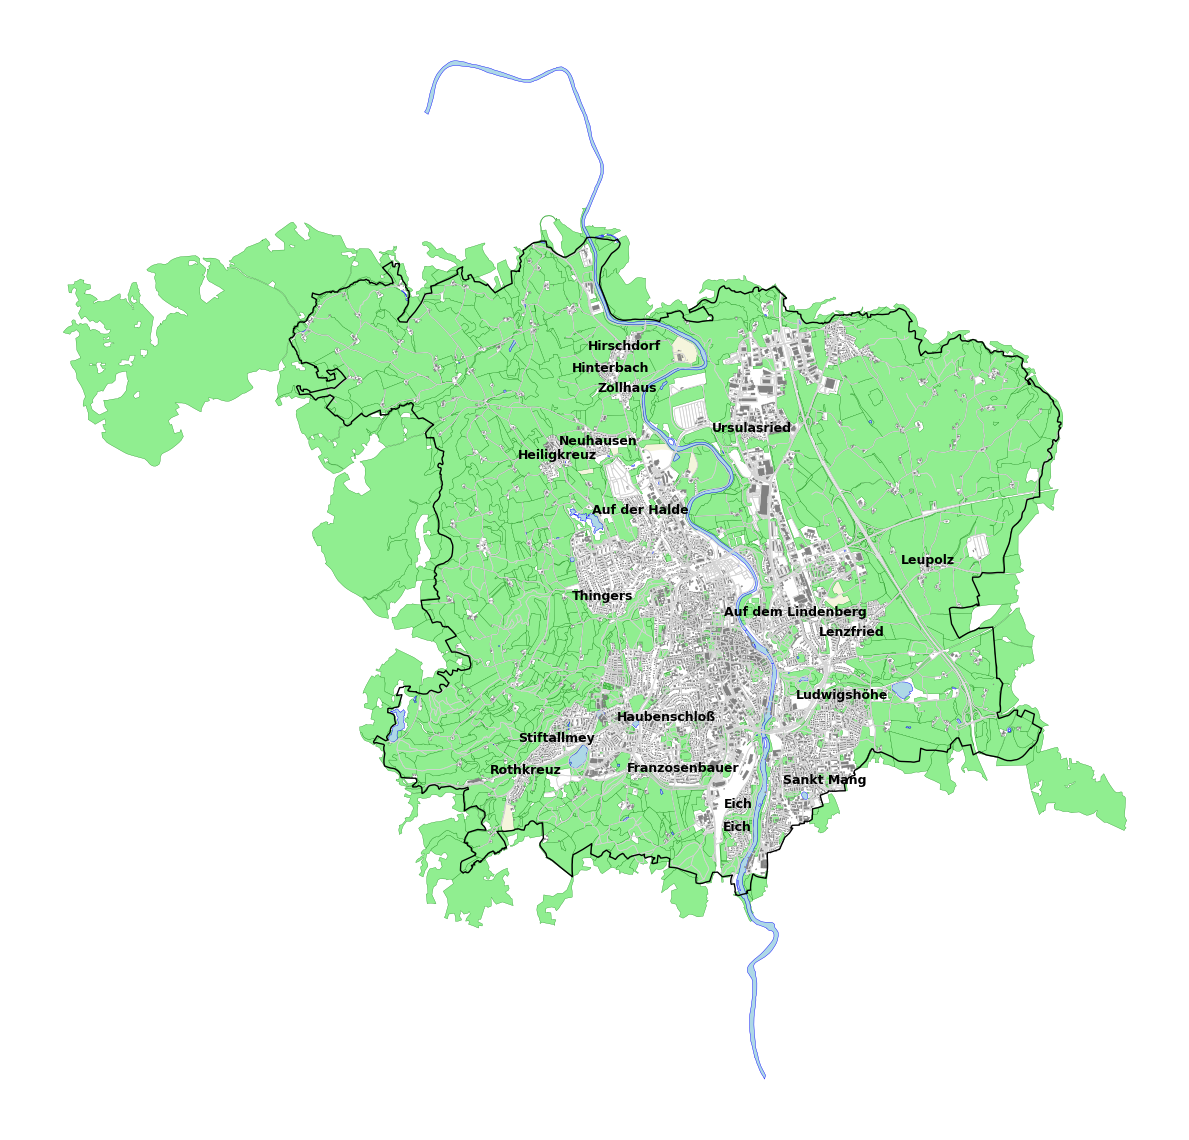

<Figure size 1200x1200 with 0 Axes>

In [ ]:
 # Stadtname
stadt = "Kempten, Bayern, Deutschland"

# Stadtgrenze laden
stadt_gdf = ox.geocode_to_gdf(stadt)
stadt_polygon = stadt_gdf.geometry.iloc[0]

# OSM-Features laden
gebäude = ox.features_from_polygon(stadt_polygon, tags={"building": True})

gewässer = ox.features_from_polygon(stadt_polygon, tags={
    "natural": "water"
})

grünflächen = ox.features_from_polygon(stadt_polygon, tags={
    "leisure": True,
    "landuse": ["grass", "meadow", "forest", "recreation_ground", "park", "village_green"]
})

landwirtschaft = ox.features_from_polygon(stadt_polygon, tags={
    "landuse": "farmland"
})

# Straßennetz
G = ox.graph_from_polygon(stadt_polygon, network_type='all')
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# Ortschaften (nur innerhalb von Nördlingen)
orte = ox.features_from_polygon(
    stadt_polygon,
    tags={"place": ["suburb", "village"]}
)

# Nur Punkte, die innerhalb der Stadtgrenze liegen
orte_punkte = orte[orte.geometry.type == "Point"]
orte_in_nördlingen = orte_punkte[orte_punkte.geometry.within(stadt_polygon)]

# Plot
fig, ax = plt.subplots(figsize=(12, 12))

# 1. Landwirtschaft (hellbeige)
if not landwirtschaft.empty:
    landwirtschaft.plot(ax=ax, color="#f5f5dc", edgecolor="none")

# 2. Grünflächen
if not grünflächen.empty:
    grünflächen.plot(ax=ax, color="lightgreen", edgecolor="green", linewidth=0.2)

# 3. Gewässer
if not gewässer.empty:
    gewässer.plot(ax=ax, color="lightblue", edgecolor="blue", linewidth=0.3)

# 4. Gebäude
if not gebäude.empty:
    gebäude.plot(ax=ax, color="gray", edgecolor="grey", linewidth=0.2)

# 5. Straßen
edges.plot(ax=ax, color="lightgrey", linewidth=0.5)

# 6. Stadtgrenze – schwarz und durchgezogen
stadt_gdf.boundary.plot(ax=ax, edgecolor="black", linewidth=1)

# 7. Ortschaftsnamen innerhalb der Stadt
for idx, row in orte_in_nördlingen.iterrows():
    name = row.get("name")
    if name:
        x, y = row.geometry.x, row.geometry.y
        ax.text(x, y, name, fontsize=9, fontweight="bold", color="black", ha='center')

# Layout
ax.axis("off")
plt.tight_layout()
plt.show()

# Speichern als PNG mit hoher Auflösung
plt.savefig("kempten.png", dpi=300, bbox_inches='tight')


In [ ]:
pip install adjustText

In [ ]:
from adjustText import adjust_text  # Für das Verhindern von Überlappungen

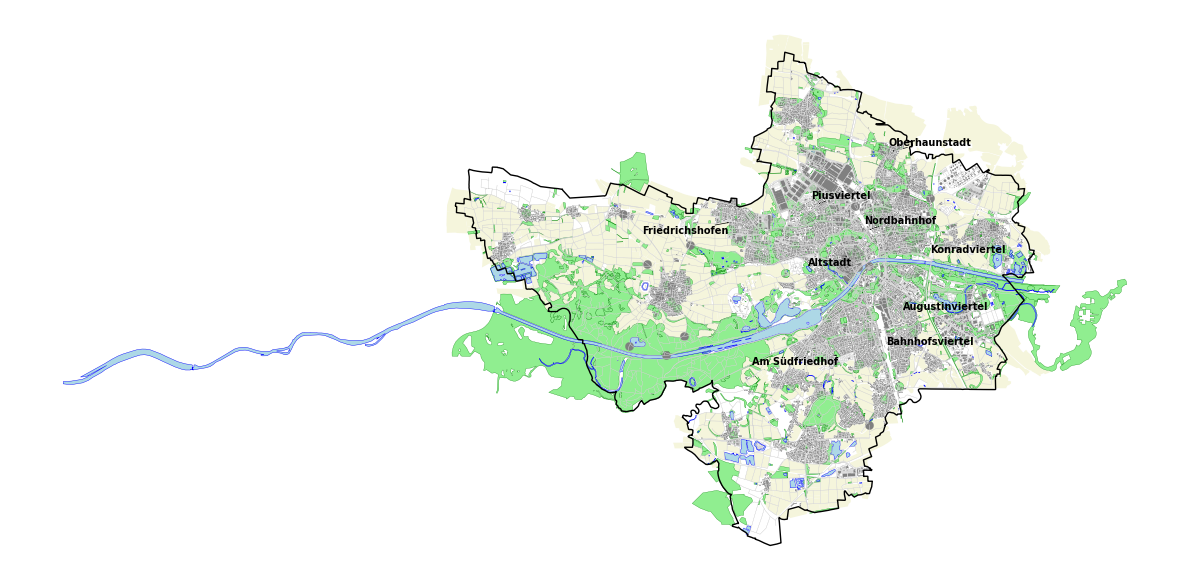

In [ ]:
# Stadtname
stadt = "Ingolstadt, Bayern, Deutschland"

# Stadtgrenze laden
stadt_gdf = ox.geocode_to_gdf(stadt)
stadt_polygon = stadt_gdf.geometry.iloc[0]

# OSM-Features laden
gebäude = ox.features_from_polygon(stadt_polygon, tags={"building": True})

gewässer = ox.features_from_polygon(stadt_polygon, tags={
    "natural": "water"
})

grünflächen = ox.features_from_polygon(stadt_polygon, tags={
    "leisure": True,
    "landuse": ["grass", "meadow", "forest", "recreation_ground", "park", "village_green"]
})

landwirtschaft = ox.features_from_polygon(stadt_polygon, tags={
    "landuse": "farmland"
})

# Straßennetz
G = ox.graph_from_polygon(stadt_polygon, network_type='all')
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# Ortschaften (nur innerhalb der Stadt)
orte = ox.features_from_polygon(
    stadt_polygon,
    tags={"place": ["suburb"]}
)

# Nur Punkte, die innerhalb der Stadtgrenze liegen
orte_punkte = orte[orte.geometry.type == "Point"]
orte_in_stadt = orte_punkte[orte_punkte.geometry.within(stadt_polygon)]

# Liste der auszuwählenden Stadtteile
stadtteile = [
    "Altstadt", "Nordbahnhof", "Konradviertel", "Bahnhofsviertel",
    "Augustinviertel", "Am Südfriedhof", "Friedrichshofen", "Piusviertel", "Oberhaunstadt"
]

# Filtere die Ortschaften nach den angegebenen Stadtteilen
orte_in_stadt_filtered = orte_in_stadt[orte_in_stadt['name'].isin(stadtteile)]

# Plot
fig, ax = plt.subplots(figsize=(12, 12))

# 1. Landwirtschaft (hellbeige)
if not landwirtschaft.empty:
    landwirtschaft.plot(ax=ax, color="#f5f5dc", edgecolor="none")

# 2. Grünflächen
if not grünflächen.empty:
    grünflächen.plot(ax=ax, color="lightgreen", edgecolor="green", linewidth=0.2)

# 3. Gewässer
if not gewässer.empty:
    gewässer.plot(ax=ax, color="lightblue", edgecolor="blue", linewidth=0.3)

# 4. Straßen
edges.plot(ax=ax, color="lightgrey", linewidth=0.2)

# 5. Gebäude
if not gebäude.empty:
    gebäude.plot(ax=ax, color="gray", edgecolor="grey", linewidth=0.2)


# 6. Stadtgrenze – schwarz und durchgezogen
stadt_gdf.boundary.plot(ax=ax, edgecolor="black", linewidth=1)

# 7. Beschriftung der ausgewählten Stadtteile
texts = []
for idx, row in orte_in_stadt_filtered.iterrows():
    name = row.get("name")
    if name:
        x, y = row.geometry.x, row.geometry.y
        texts.append(ax.text(x, y, name, fontsize=7, fontweight="bold", color="black", ha='center'))

# Verhindern von Überlappungen der Beschriftungen
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="black", lw=0.5))

# Layout
ax.axis("off")
plt.tight_layout()
plt.show()
